In [1]:
%reset -f
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
## load the data
exam_df = pd.read_csv('datasets/exams.csv')
exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
37,female,group D,associate's degree,free/reduced,none,57,58,62
54,male,group B,associate's degree,standard,completed,81,76,75
39,female,group D,some college,standard,none,75,92,89
91,male,group D,some high school,standard,none,70,58,57
43,female,group B,associate's degree,standard,completed,48,63,52


In [3]:
## learn more about the data
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.730000,69.980000,69.140000
std,15.631395,13.732642,14.886792
min,18.000000,25.000000,20.000000
25%,58.000000,61.000000,62.000000
50%,69.000000,71.500000,69.000000
75%,78.250000,80.000000,81.000000
max,96.000000,94.000000,93.000000


In [4]:
## learn more about the data
exam_df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
## preprocessing to standardize the dataset
## this gives the data 0 mean and unit (1) variance so we can compare values even though they have different distributions
## subtract the mean, divide by the standard deviation
from sklearn import preprocessing
exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))

In [6]:
## negative scores are below the mean, while positive are above the mean
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,0.210248,0.440580,-0.009452
1,female,group C,some college,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,high school,standard,none,0.531729,0.147836,-0.076964
3,female,group B,some college,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,bachelor's degree,standard,completed,0.017360,0.440580,0.733181


In [7]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.642331e-16,-3.048950e-16,-4.468648e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.133149e+00,-3.291909e+00,-3.317542e+00
25%,-5.613050e-01,-6.572107e-01,-4.820360e-01
50%,1.459522e-01,1.112428e-01,-9.451687e-03
75%,7.406911e-01,7.333242e-01,8.006929e-01
max,1.881947e+00,1.757929e+00,1.610838e+00


In [8]:
## there are categorical information in this dataframe, let's start with 'parental level of education'
exam_df['parental level of education'].unique()

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

In [9]:
## This data has a hierarchy so make a list of the values in the hierarichal order
parental_level_of_education = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]
parental_level_of_education

['some high school',
 'high school',
 'some college',
 "associate's degree",
 "bachelor's degree",
 "master's degree"]

In [10]:
## label encode the hierarichal data
label_encoding = preprocessing.LabelEncoder()
label_encoding = label_encoding.fit(parental_level_of_education)

In [11]:
## change the column to the label encoded values
exam_df['parental level of education'] = label_encoding.transform(exam_df['parental level of education'].astype(str))
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,0,standard,none,0.210248,0.440580,-0.009452
1,female,group C,4,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,2,standard,none,0.531729,0.147836,-0.076964
3,female,group B,4,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,1,standard,completed,0.017360,0.440580,0.733181


In [12]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [13]:
## categorical data without hierarichy can be converted with one-hot-encoding
exam_df = pd.get_dummies(exam_df, columns=['race/ethnicity'])
exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,0,standard,none,0.210248,0.440580,-0.009452,0,0,0,0,1
1,female,4,standard,none,-1.268562,-1.315885,-1.292181,0,0,1,0,0
2,male,2,standard,none,0.531729,0.147836,-0.076964,0,0,0,0,1
3,female,4,free/reduced,completed,-1.461450,-1.315885,-1.022132,0,1,0,0,0
4,female,1,standard,completed,0.017360,0.440580,0.733181,0,1,0,0,0


In [14]:
## more one hot encoding
exam_df = pd.get_dummies(exam_df, columns=['gender','lunch','test preparation course'])
exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.210248,0.440580,-0.009452,0,0,0,0,1,1,0,0,1,0,1
1,4,-1.268562,-1.315885,-1.292181,0,0,1,0,0,1,0,0,1,0,1
2,2,0.531729,0.147836,-0.076964,0,0,0,0,1,0,1,0,1,0,1
3,4,-1.461450,-1.315885,-1.022132,0,1,0,0,0,1,0,1,0,1,0
4,1,0.017360,0.440580,0.733181,0,1,0,0,0,1,0,0,1,1,0


In [15]:
## split the data for modeling
from sklearn.model_selection import train_test_split
X = exam_df.drop('math score',axis=1)
Y = exam_df['math score']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [21]:
## one-hot encoding + fit_intercept=True may trigger a create perfect collinearity (aka the dummy trap)
## try training data with fit_intercept = True
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True).fit(x_train,y_train)
print("Training_Score: ", linear_model.score(x_train, y_train))
from sklearn.metrics import r2_score
y_pred = linear_model.predict(x_test)
print("Testing_score: ",r2_score(y_test, y_pred))

Training_Score:  0.8734776661465866
Testing_score:  0.9037833158913755


In [24]:
## linear regression catches and fixes the dummy trap thus our results are the same
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=False).fit(x_train,y_train)
print("Training_Score: ", linear_model.score(x_train, y_train))
from sklearn.metrics import r2_score
y_pred = linear_model.predict(x_test)
print("Testing_score: ",r2_score(y_test, y_pred))

Training_Score:  0.8734776661465866
Testing_score:  0.9037833158913745


In [25]:
df_pred_actual = pd.DataFrame({'predicted':y_pred,'actual':y_test})
df_pred_actual.head()

,predicted,actual
13,-0.183512,0.145952
74,-0.569357,-0.561305
26,0.581772,0.788913
23,-2.387151,-3.133149
20,0.929215,0.917505


<IPython.core.display.Javascript object>


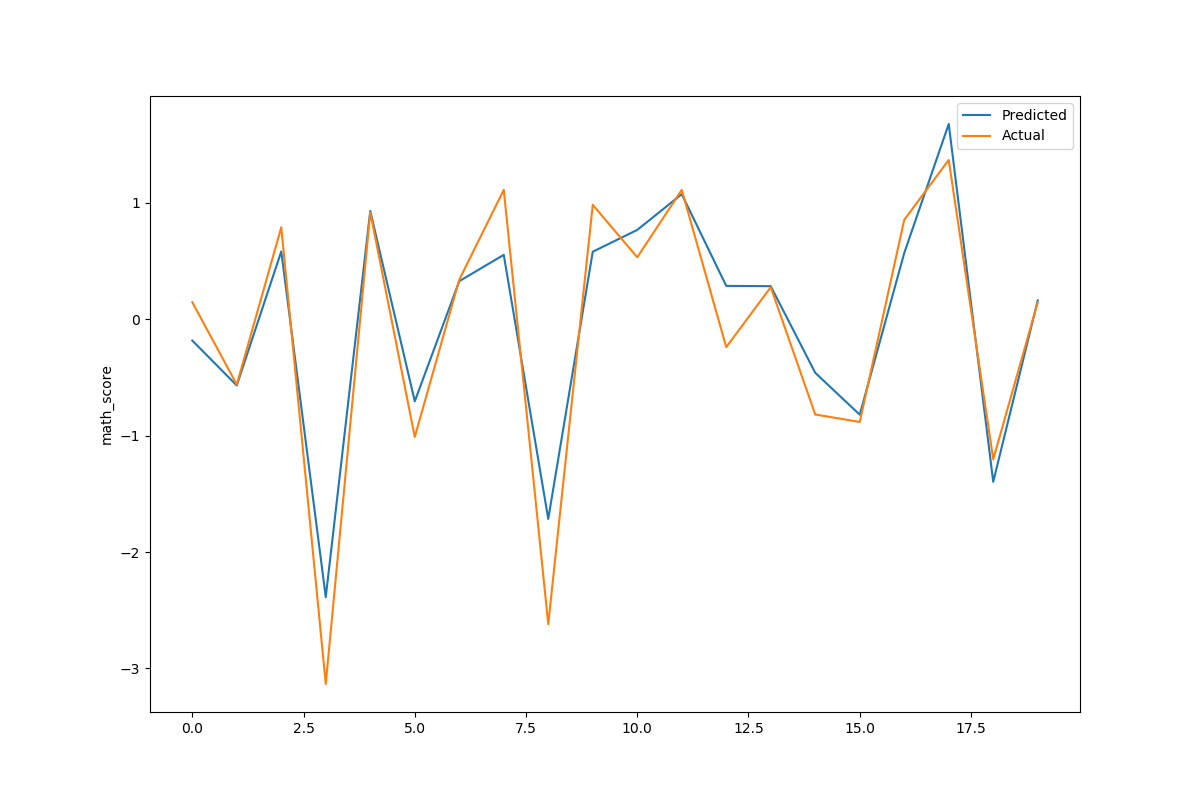

In [26]:
## graph that ish
plt.figure(figsize = (12, 8))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('math_score')
plt.legend()
plt.show;

In [27]:
## this model turns to as when it doesn't have the other tests scores
## This means the 
X = exam_df.drop(['math score','writing score', 'reading score'],axis=1)
Y = exam_df['math score']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
linear_model = LinearRegression(fit_intercept=True).fit(x_train,y_train)
print("Training_Score: ", linear_model.score(x_train, y_train))
y_pred = linear_model.predict(x_test)
print("Testing_score: ",r2_score(y_test, y_pred))

Training_Score:  0.3192545447885884
Testing_score:  0.3633605279918144


In [28]:
## let's remove some features and see how that models
## add the features
X = exam_df.drop(['math score','writing score'],axis=1)
Y = exam_df['math score']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
linear_model = LinearRegression(fit_intercept=True).fit(x_train,y_train)
print("Training_Score: ", linear_model.score(x_train, y_train))
y_pred = linear_model.predict(x_test)
print("Testing_score: ",r2_score(y_test, y_pred))

Training_Score:  0.8590002618630863
Testing_score:  0.7455776629228099
